# Exemple de Classification avec sklearn

On va utiliser la méthode de knn classification en utilisant la bibliothèque sklearn python avec l'exemple des distances de notre dataset pour le wall following ,tel qu'on a ses quatres actions : "Move-Forward", "Slight-Right-Turn", "Sharp-Right-Turn", "Slight-Left-Turn".

In [11]:
import pandas as pd

In [41]:
df= pd.read_csv('Downloads/dataset.arff')
df.head()

,capteur_milieu,capteur_gauche,action
0,1.687,0.445,Slight-Right-Turn
1,1.687,0.449,Slight-Right-Turn
2,1.687,0.449,Slight-Right-Turn
3,1.687,0.449,Slight-Right-Turn
4,1.687,0.449,Slight-Right-Turn


In [42]:
classes = ("Move-Forward", "Slight-Right-Turn", "Sharp-Right-Turn", "Slight-Left-Turn")
n_classes = len(classes)

for i, item in enumerate(classes):
    df = df.replace(to_replace = item, value = i)

In [46]:
df['etiquette'] =df.action.apply(lambda x: classes[x])
df[df.action==1].head()

,capteur_milieu,capteur_gauche,action,etiquette
0,1.687,0.445,1,Slight-Right-Turn
1,1.687,0.449,1,Slight-Right-Turn
2,1.687,0.449,1,Slight-Right-Turn
3,1.687,0.449,1,Slight-Right-Turn
4,1.687,0.449,1,Slight-Right-Turn


In [26]:
df0 = df[df.action==0]
df1 = df[df.action==1]
df2 = df[df.action==2]
df3 = df[df.action==3]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

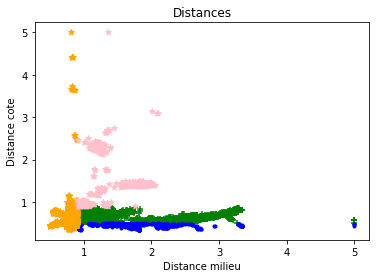

In [29]:
plt.title('Distances')
plt.xlabel('Distance milieu')
plt.ylabel('Distance cote')
plt.scatter(df0['capteur_milieu'], df0['capteur_gauche'],color="green",marker='+')
plt.scatter(df1['capteur_milieu'], df1['capteur_gauche'],color="blue",marker='.')
plt.scatter(df2['capteur_milieu'], df2['capteur_gauche'],color="orange",marker='*')
plt.scatter(df3['capteur_milieu'], df3['capteur_gauche'],color="pink",marker='*')

## DECOUPE LE DATASET EN TRAIN ET TEST

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop(['action','etiquette'], axis='columns')
y = df.action

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
len(X_train)

4364

In [54]:
len(X_test)

1092

## ON PROCEDE A NOTRE TRAVAIL AVEC KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.score(X_test, y_test)

0.9798534798534798

## MATRICE DE CONFUSION

In [58]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[402,   5,   1,   1],
       [ 12, 147,   2,   0],
       [  0,   0, 446,   0],
       [  1,   0,   0,  75]], dtype=int64)

Text(42.0, 0.5, 'Truth')

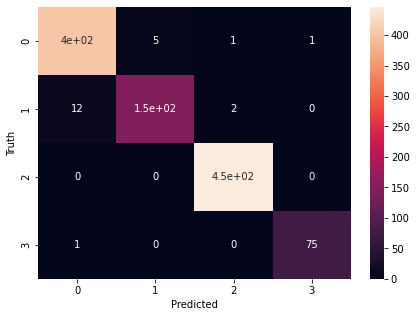

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [4]:
df= pd.read_csv('Downloads/newDataKNN.txt')
df.head()

,middle,left,action,time
0,1.0,0.382223,Slight-Right-Turn,0.650571
1,1.0,0.399325,Slight-Right-Turn,0.679555
2,1.0,0.419367,Slight-Right-Turn,0.738385
3,1.0,0.443920,Move-Forward,0.765440
4,1.0,0.451097,Move-Forward,0.801350


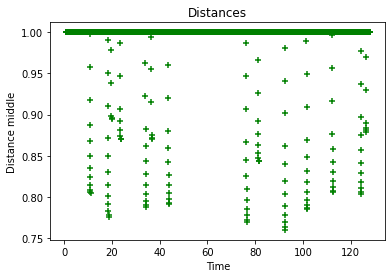

In [7]:
plt.title('Distances')
plt.xlabel('Time')
plt.ylabel('Distance middle')
plt.scatter(df['time'],df['middle'],color="green",marker='+')

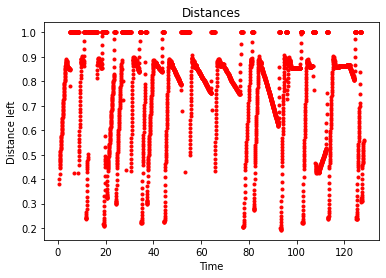

In [8]:
plt.title('Distances')
plt.xlabel('Time')
plt.ylabel('Distance left')
plt.scatter(df['time'],df['left'],color="red",marker='.')

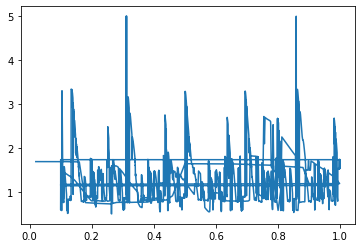

In [26]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dataset=pd.read_excel("Downloads\data_set.xlsx")
plt.plot(dataset.iloc[:,:-1].to_numpy(),dataset.iloc[:,-1:].to_numpy())